In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [5]:
# Adjust path if needed
credit_card_data = pd.read_csv('creditcard.csv')
print("Dataset Loaded Successfully ✅")


Dataset Loaded Successfully ✅


In [6]:
print(credit_card_data.shape)
print(credit_card_data['Class'].value_counts())


(284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


In [7]:
print(credit_card_data.shape)
print(credit_card_data['Class'].value_counts())


(284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


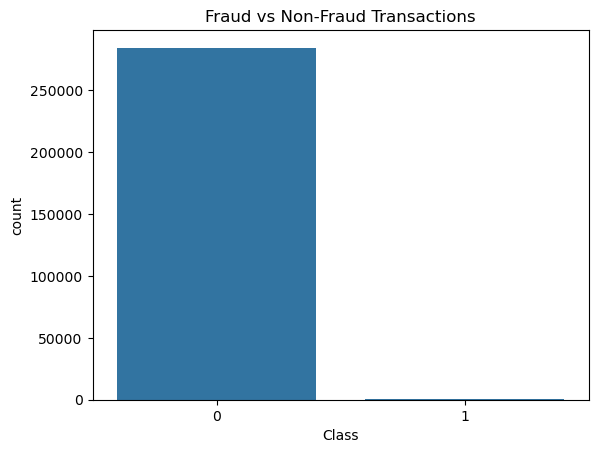

In [8]:
# Count plot
sns.countplot(x='Class', data=credit_card_data)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()



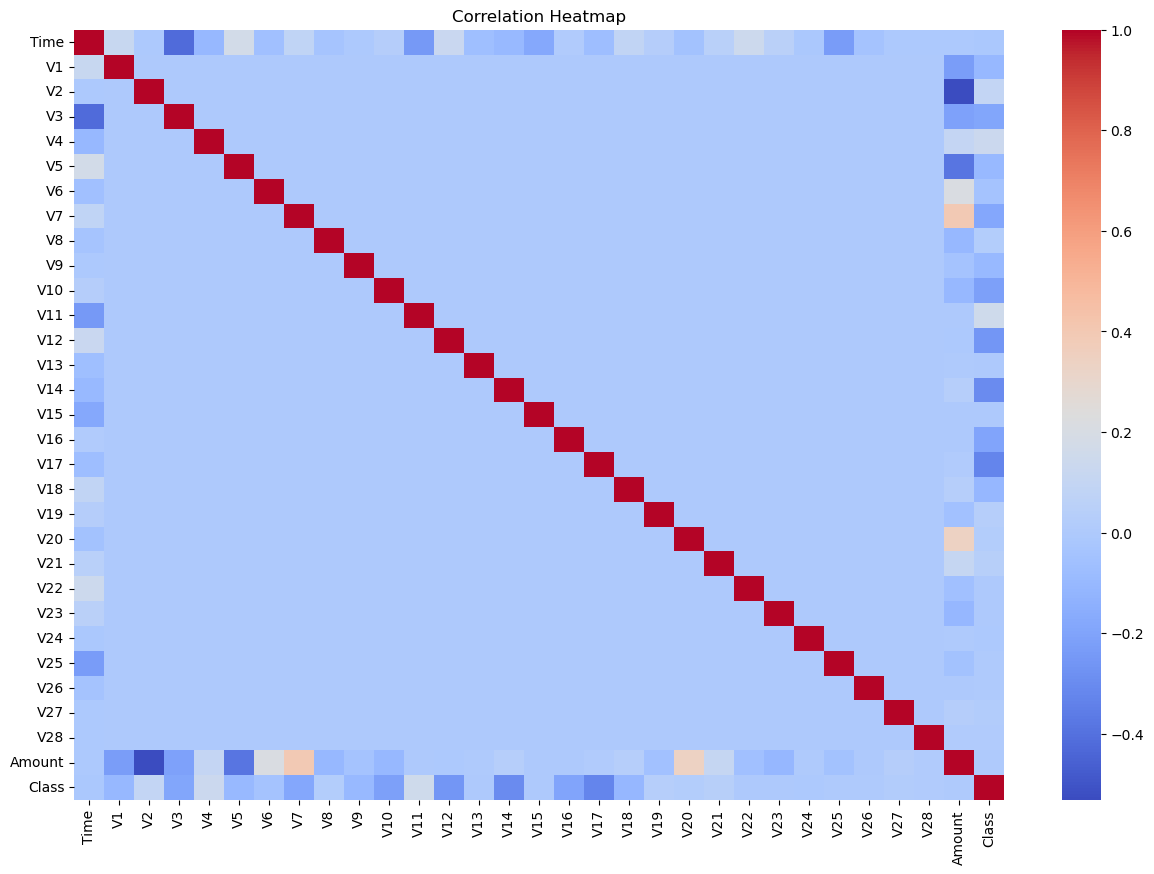

In [9]:
# Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(credit_card_data.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# Features and target
X = credit_card_data.drop('Class', axis=1)
y = credit_card_data['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [11]:
model1 = LogisticRegression()
model2 = SVC()
model3 = KNeighborsClassifier()
model4 = DecisionTreeClassifier()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)


DecisionTreeClassifier()

In [12]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)


In [13]:
acc1 = accuracy_score(y_test, y_pred1)
prec1 = precision_score(y_test, y_pred1)
rec1 = recall_score(y_test, y_pred1)
f1_1 = f1_score(y_test, y_pred1)

acc2 = accuracy_score(y_test, y_pred2)
prec2 = precision_score(y_test, y_pred2)
rec2 = recall_score(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)

acc3 = accuracy_score(y_test, y_pred3)
prec3 = precision_score(y_test, y_pred3)
rec3 = recall_score(y_test, y_pred3)
f1_3 = f1_score(y_test, y_pred3)

acc4 = accuracy_score(y_test, y_pred4)
prec4 = precision_score(y_test, y_pred4)
rec4 = recall_score(y_test, y_pred4)
f1_4 = f1_score(y_test, y_pred4)


In [14]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree'],
    'Accuracy': [acc1, acc2, acc3, acc4],
    'Precision': [prec1, prec2, prec3, prec4],
    'Recall': [rec1, rec2, rec3, rec4],
    'F1 Score': [f1_1, f1_2, f1_3, f1_4]
})

print("🔍 Model Comparison:")
print(results.sort_values(by='F1 Score', ascending=False))


🔍 Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
2                  KNN  0.999544   0.918605  0.806122  0.858696
1                  SVM  0.999421   0.957746  0.693878  0.804734
3        Decision Tree  0.999070   0.722772  0.744898  0.733668
0  Logistic Regression  0.999140   0.826667  0.632653  0.716763
